In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from textblob import TextBlob

In [10]:
def load_txt(path):
    data=[]
    with open(path, 'r') as f:
            for l in f:
                data.append(l.strip().split('\t'))
    return np.array(data, dtype=np.float32)

In [3]:
rel_data = load_txt("../data/data/A1-rel-data.txt")

In [4]:
whole_data = load_txt("../data/data/A1-whole-data.txt")

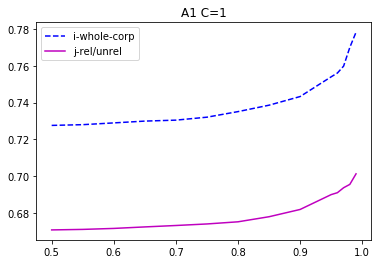

In [23]:
plt.title('A1 C=1')

plt.plot(rel_data[:,0], rel_data[:,3], 'b--', label='i-whole-corp')
plt.plot(rel_data[:,0],rel_data[:,4], 'm', label='j-rel/unrel')
plt.legend()
plt.show()

# Accuracy A-1-i VS Accuracy A-1-j

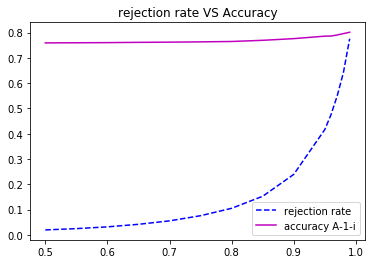

In [26]:
plt.title('rejection rate VS Accuracy')
plt.plot(whole_data[:,0], whole_data[:,2], 'b--', label='rejection rate')
plt.plot(whole_data[:,0],whole_data[:,3], 'm', label='accuracy A-1-i')
plt.legend()
plt.show()

# rejection rate VS accuracy on A-1-i

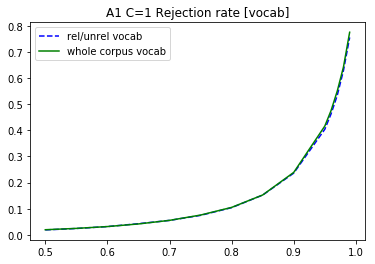

In [7]:
plt.title('A1 C=1 Rejection rate [vocab]')
plt.plot(rel_data[:,0], rel_data[:,2], 'b--', label='rel/unrel vocab')
plt.plot(whole_data[:,0],whole_data[:,2], 'g', label='whole corpus vocab')
plt.legend()
plt.show()

# bigger vocab gives a slightly less rejection rate

## Fit Vocab VS Human-terms

In [8]:
A1_human = load_txt("../data/data/A1-human.txt")

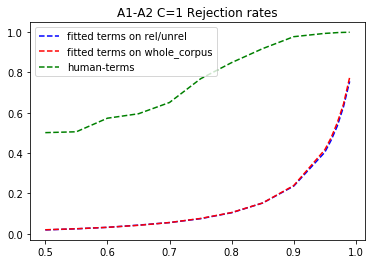

In [9]:
plt.title('A1-A2 C=1 Rejection rates')
plt.plot(rel_data[:,0], rel_data[:,2], 'b--', label='fitted terms on rel/unrel')
plt.plot(whole_data[:,0], whole_data[:,2], 'r--', label='fitted terms on whole_corpus')
plt.plot(A1_human[:,0],A1_human[:,2], 'g--', label='human-terms')
plt.legend()
plt.show()

# Human terms gives higher rejection rate
# We need bigger vocabulary to avoid rejection rate. 

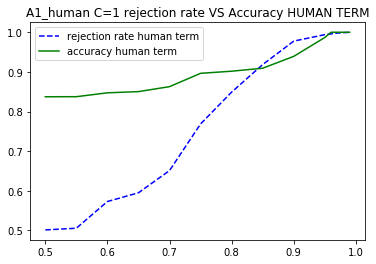

In [10]:
plt.title('A1_human C=1 rejection rate VS Accuracy HUMAN TERM')
plt.plot(A1_human[:,0], A1_human[:,2], 'b--', label='rejection rate human term')
plt.plot(A1_human[:,0],A1_human[:,3], 'g', label='accuracy human term')
plt.legend()
plt.show()

# rejection rate VS accuracy on A-2

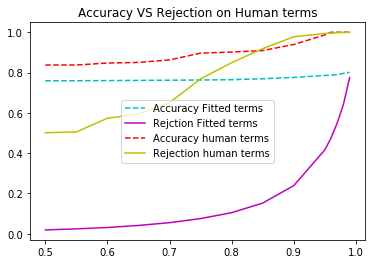

In [20]:
plt.title('Accuracy VS Rejection on Human terms')

# plt.plot(rel_data[:,0], rel_data[:,3], 'b--', label='Accuracy A-1-i rel')
# plt.plot(rel_data[:,0],rel_data[:,2], 'g', label='Rejection A-1-i rel')
plt.plot(whole_data[:,0], whole_data[:,3], 'c--', label='Accuracy Fitted terms')
plt.plot(whole_data[:,0],whole_data[:,2], 'm', label='Rejction Fitted terms')
plt.plot(A1_human[:,0], A1_human[:,3], 'r--', label='Accuracy human terms')
plt.plot(A1_human[:,0],A1_human[:,2], 'y', label='Rejection human terms')
plt.legend()
plt.show()



NameError: name 'A2_data' is not defined

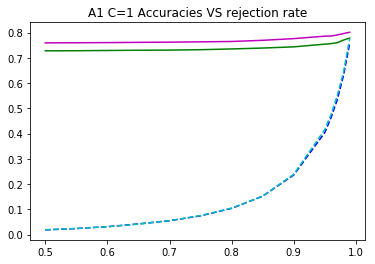

In [12]:
plt.title('A1 C=1 Accuracies VS rejection rate')

plt.plot(rel_data[:,0], rel_data[:,2], 'b--', label='rejection rate A-1-i rel')
plt.plot(rel_data[:,0],rel_data[:,3], 'g', label='Accuracy A-1-i rel')
plt.plot(whole_data[:,0], whole_data[:,2], 'c--', label='rejection rate A-1-i whole')
plt.plot(whole_data[:,0],whole_data[:,3], 'm', label='Accuracy A-1-i whole')
plt.plot(A2_data[:,0], A2_data[:,2], 'r--', label='rejection rate A-1-i human')
plt.plot(A2_data[:,0],A2_data[:,3], 'y', label='Accuracy A-1-j human')
plt.legend()
plt.show()



### 1st approach, 2nd approach

In [ ]:
A2_rel = load_txt("../data/data/A2-rel-data.txt")

In [ ]:
plt.title('A1-2 C=1 Accuracies rel data')

plt.plot(rel_data[:,0], rel_data[:,2], 'k', label='rejection rate A-1-i')
plt.plot(rel_data[:,0], rel_data[:,3], 'burlywood', label='Accuracy A-1-i')
plt.plot(rel_data[:,0],rel_data[:,4], 'g', label='Accuracy A-1-j')

plt.plot(A2_rel[:,0], A2_rel[:,2], 'c--', label='rejection rate A-2-i')
plt.plot(A2_rel[:,0], A2_rel[:,3], 'r--', label='Accuracy A-2-i')
plt.plot(A2_rel[:,0],A2_rel[:,4], 'm--', label='Accuracy A-2-j')
plt.legend()
plt.show()

# 2nd approach gives better accuracy. regardless the rejection rate

Overall :

1. Bigger vocabulary gives higher accuracy
2. Human terms doesn't help
3. Less vocabulary gives higher rejection rate
4. pich highest confidence on +/- classifier gives higher accuracy (select sentences above thresholds)

### ggplot

In [5]:
from plotnine import *
from plotnine.data import *

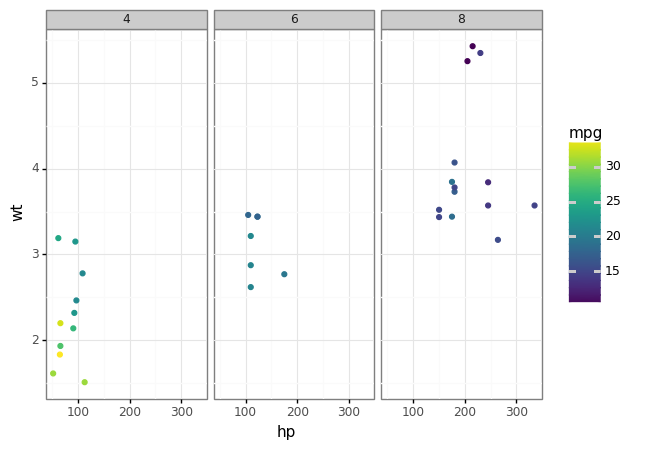

<ggplot: (134247369697)>

In [6]:
ggplot(mtcars, aes(x='hp', y='wt', color='mpg')) + geom_point() +\
facet_wrap("~cyl") + theme_bw()

In [28]:
lrcv = load_txt("../data/data/lrcv.txt")
lrtf = load_txt("../data/data/lrtfidf.txt")

mnbcv = load_txt("../data/data/mnbcv.txt")
mnbtf = load_txt("../data/data/mnbtfidf.txt")

In [12]:
lrcv.shape

(14, 4)

In [29]:
lrcv

array([[5.0000e-01, 4.8300e+02, 1.9320e-02, 7.5911e-01],
       [5.5000e-01, 6.1100e+02, 2.4440e-02, 7.5956e-01],
       [6.0000e-01, 7.8600e+02, 3.1440e-02, 7.6014e-01],
       [6.5000e-01, 1.0370e+03, 4.1480e-02, 7.6117e-01],
       [7.0000e-01, 1.3800e+03, 5.5200e-02, 7.6194e-01],
       [7.5000e-01, 1.8880e+03, 7.5520e-02, 7.6315e-01],
       [8.0000e-01, 2.6210e+03, 1.0484e-01, 7.6460e-01],
       [8.5000e-01, 3.8110e+03, 1.5244e-01, 7.6927e-01],
       [9.0000e-01, 5.9750e+03, 2.3900e-01, 7.7593e-01],
       [9.5000e-01, 1.0408e+04, 4.1632e-01, 7.8570e-01],
       [9.6000e-01, 1.1884e+04, 4.7536e-01, 7.8614e-01],
       [9.7000e-01, 1.3749e+04, 5.4996e-01, 7.9042e-01],
       [9.8000e-01, 1.6057e+04, 6.4228e-01, 7.9582e-01],
       [9.9000e-01, 1.9392e+04, 7.7568e-01, 8.0118e-01]], dtype=float32)

In [30]:
lrtf

array([[5.0000e-01, 7.8400e+02, 3.1360e-02, 7.7994e-01],
       [5.5000e-01, 2.0690e+03, 8.2760e-02, 7.8204e-01],
       [6.0000e-01, 4.5530e+03, 1.8212e-01, 7.8740e-01],
       [6.5000e-01, 7.9590e+03, 3.1836e-01, 7.9514e-01],
       [7.0000e-01, 1.1997e+04, 4.7988e-01, 8.0328e-01],
       [7.5000e-01, 1.6051e+04, 6.4204e-01, 8.1249e-01],
       [8.0000e-01, 1.9425e+04, 7.7700e-01, 8.2422e-01],
       [8.5000e-01, 2.2095e+04, 8.8380e-01, 8.3236e-01],
       [9.0000e-01, 2.3859e+04, 9.5436e-01, 8.2559e-01],
       [9.5000e-01, 2.4786e+04, 9.9144e-01, 8.2710e-01],
       [9.6000e-01, 2.4865e+04, 9.9460e-01, 8.3704e-01],
       [9.7000e-01, 2.4934e+04, 9.9736e-01, 8.3333e-01],
       [9.8000e-01, 2.4978e+04, 9.9912e-01, 1.0000e+00]], dtype=float32)

### Accuracy

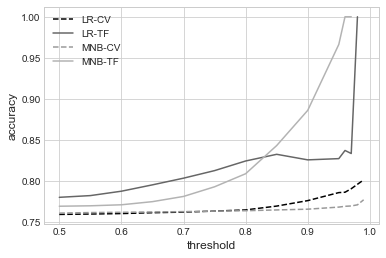

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

# use ggplot style sheet
style.use('seaborn-whitegrid')

plt.plot(lrcv[:,0], lrcv[:,3], '--',label='LR-CV')
plt.plot(lrtf[:,0], lrtf[:,3], label='LR-TF')
plt.plot(mnbcv[:,0], mnbcv[:,3], '--',label='MNB-CV')
plt.plot(mnbtf[:,0], mnbtf[:,3], label='MNB-TF')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Rejection Rate

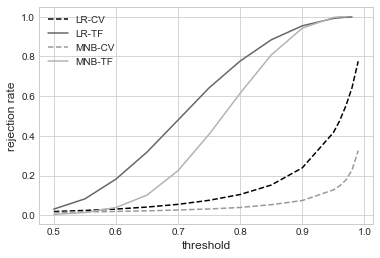

In [43]:
plt.plot(lrcv[:,0], lrcv[:,2], '--',label='LR-CV')
plt.plot(lrtf[:,0], lrtf[:,2], label='LR-TF')
plt.plot(mnbcv[:,0], mnbcv[:,2], '--',label='MNB-CV')
plt.plot(mnbtf[:,0], mnbtf[:,2], label='MNB-TF')
plt.xlabel('threshold')
plt.ylabel('rejection rate')
plt.legend()
plt.show()

### Logistic Regression

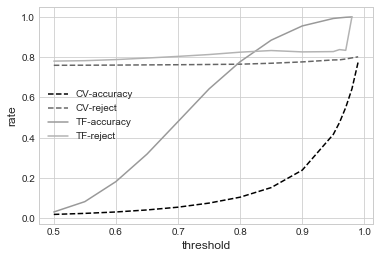

In [58]:
plt.plot(lrcv[:,0], lrcv[:,2], '--',label='CV-accuracy')
plt.plot(lrcv[:,0], lrcv[:,3], '--',label='CV-reject')
plt.plot(lrtf[:,0], lrtf[:,2], label='TF-accuracy')
plt.plot(lrtf[:,0], lrtf[:,3], label='TF-reject')
plt.xlabel('threshold')
plt.ylabel('rate')
plt.legend()
plt.show()

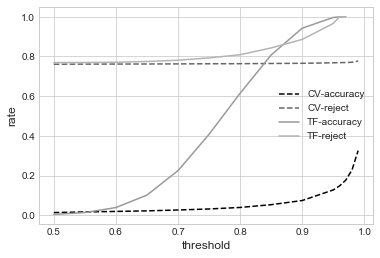

In [57]:
plt.plot(mnbcv[:,0], mnbcv[:,2], '--',label='CV-accuracy')
plt.plot(mnbcv[:,0], mnbcv[:,3], '--',label='CV-reject')
plt.plot(mnbtf[:,0], mnbtf[:,2], label='TF-accuracy')
plt.plot(mnbtf[:,0], mnbtf[:,3], label='TF-reject')
plt.xlabel('threshold')
plt.ylabel('rate')
plt.legend(loc=7)
plt.show()

In [ ]:
plt.plot(rel_data[:,0], rel_data[:,2], 'k', label='rejection rate A-1-i')
plt.plot(rel_data[:,0], rel_data[:,3], 'burlywood', label='Accuracy A-1-i')
plt.plot(rel_data[:,0],rel_data[:,4], 'g', label='Accuracy A-1-j')

plt.plot(A2_rel[:,0], A2_rel[:,2], 'c--', label='rejection rate A-2-i')
plt.plot(A2_rel[:,0], A2_rel[:,3], 'r--', label='Accuracy A-2-i')
plt.plot(A2_rel[:,0],A2_rel[:,4], 'm--', label='Accuracy A-2-j')
plt.legend()
plt.show()